In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

In [2]:
df = pd.read_csv("../../datasets/housing-prices-dataset/numerical_train.csv")

In [3]:
df.head()

,SalePrice,OverallQual,LotArea,EnclosedPorch,TotRmsAbvGrd,MiscVal,KitchenAbvGr,PoolArea,WoodDeckSF,GrLivArea,...,HalfBath,ScreenPorch,BsmtFullBath,LotFrontage,BsmtFinSF1,MasVnrArea,YearBuilt,Fireplaces,MSSubClass,LowQualFinSF
0,208500,7,8450,0,8,0,1,0,0,1710,...,1,0,1,65.0,706,196.0,2003,0,60,0
1,181500,6,9600,0,6,0,1,0,298,1262,...,0,0,0,80.0,978,0.0,1976,1,20,0
2,223500,7,11250,0,6,0,1,0,0,1786,...,1,0,1,68.0,486,162.0,2001,1,60,0
3,140000,7,9550,272,7,0,1,0,0,1717,...,0,0,1,60.0,216,0.0,1915,1,70,0
4,250000,8,14260,0,9,0,1,0,192,2198,...,1,0,1,84.0,655,350.0,2000,1,60,0


### For single feature Linear Regression let us find a most important single feature for predicting SalePrice

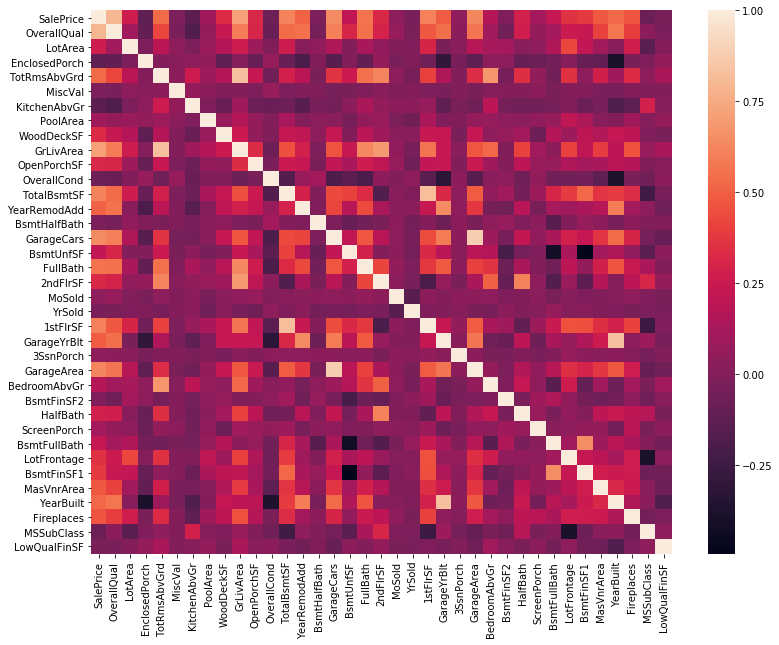

In [4]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr())
plt.show()

From the above image it seems lke the highest correlated feature with Sales price is **OverallQual**

In [5]:
df.corr()["SalePrice"].nlargest(2)

SalePrice      1.000000
OverallQual    0.790982
Name: SalePrice, dtype: float64

So the highest correlated column with SalePrice is **OverallQual** excluding the **SalePrice** itself since this is what we need to predict.

In [6]:
df = df[['OverallQual','SalePrice']]

In [7]:
df.head()

,OverallQual,SalePrice
0,7,208500
1,6,181500
2,7,223500
3,7,140000
4,8,250000


### Getting data ready for the model

In [8]:
X = df['OverallQual'].values
y = df['SalePrice'].values

### Using 3 Degree polynomial

In [9]:
polyFeatures = PolynomialFeatures(3)

In [10]:
X = polyFeatures.fit_transform(X.reshape(-1,1))

In [11]:
X[:10]

array([[  1.,   7.,  49., 343.],
       [  1.,   6.,  36., 216.],
       [  1.,   7.,  49., 343.],
       [  1.,   7.,  49., 343.],
       [  1.,   8.,  64., 512.],
       [  1.,   5.,  25., 125.],
       [  1.,   8.,  64., 512.],
       [  1.,   7.,  49., 343.],
       [  1.,   7.,  49., 343.],
       [  1.,   5.,  25., 125.]])

In [12]:
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.20)

### Model Training

In [13]:
LR = LinearRegression()

In [14]:
LR.fit(x_train,y_train.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
val_predictions = LR.predict(x_val)

### Plotting data and regression line

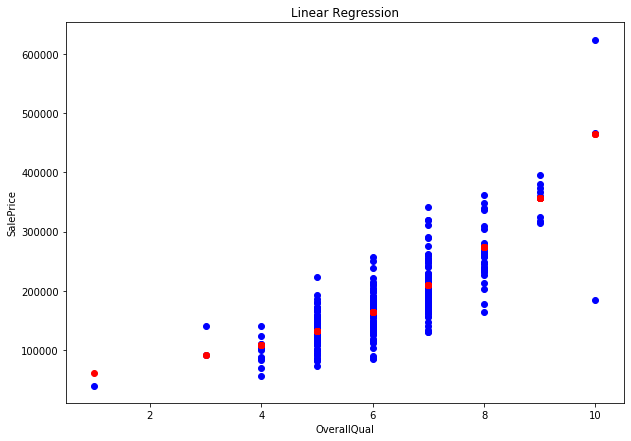

In [16]:
plt.figure(figsize=(10,7))
plt.scatter(x_val[:,1], y_val, color = 'blue') 
plt.scatter(x_val[:,1], LR.predict(x_val), color = 'red')
#plt.plot(x_val[:,1], LR.predict(x_val), color = 'k')
plt.title('Linear Regression') 
plt.xlabel('OverallQual') 
plt.ylabel('SalePrice')
plt.show()

The red dots are the predicted points for any given value of **OverallQual**

In [17]:
LR.score(x_val,y_val.reshape(-1,1))

0.6588299233690886

Pretty good score!